In [115]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import joblib

In [116]:
model_1=joblib.load('logistic_regression_model.pkl')
model_2=joblib.load('knn.pkl')
model_3=joblib.load('Perceptron.pkl')

In [117]:
data = pd.read_csv('data_clean.csv')
y = data.diagnosis.values
x_data = data.drop(["diagnosis", "Unnamed: 0"], axis = 1)
# Chuẩn hóa 
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [118]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [119]:
y_pred1 = model_1.predict(X_test)
y_pred2 = model_2.predict(X_test)
y_pred3 = model_3.predict(X_test)

In [120]:
y_pred1

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
      dtype=int64)

BẢNG SO SÁNH

In [121]:
#model 1
cross_val1 = cross_val_score(model_1, x, y, cv = 10, scoring = 'accuracy') 
accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)
auc1 = roc_auc_score(y_test, y_pred1)
#model 2
cross_val2 = cross_val_score(model_2, x, y, cv = 10, scoring = 'accuracy')
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)
auc2 = roc_auc_score(y_test, y_pred2)
#model 3
cross_val3 = cross_val_score(model_3, x, y, cv = 10, scoring = 'accuracy')
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
auc3 = roc_auc_score(y_test, y_pred3)

BẢNG SO SÁNH

In [122]:
# lập bảng so sánh
data1 = {
    'Model': ['Logistic_regression','KNN','PLA'],
    "cross_val":[cross_val1.mean(), cross_val2.mean(), cross_val3.mean()],
    'Accuracy': [accuracy1, accuracy2, accuracy3],
    'Precision': [precision1, precision2, precision3],
    'Recall': [recall1, recall2, recall3],
    'F1 Score': [f1_1, f1_2, f1_3],
    'AUC': [auc1, auc2, auc3]
}

df = pd.DataFrame(data1)
df

,Model,cross_val,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_regression,0.868233,0.895349,1.0,0.71875,0.836364,0.859375
1,KNN,0.931516,0.976744,1.0,0.93750,0.967742,0.968750
2,PLA,0.889254,0.895349,1.0,0.71875,0.836364,0.859375


BIỂU ĐỒ SO SÁNH

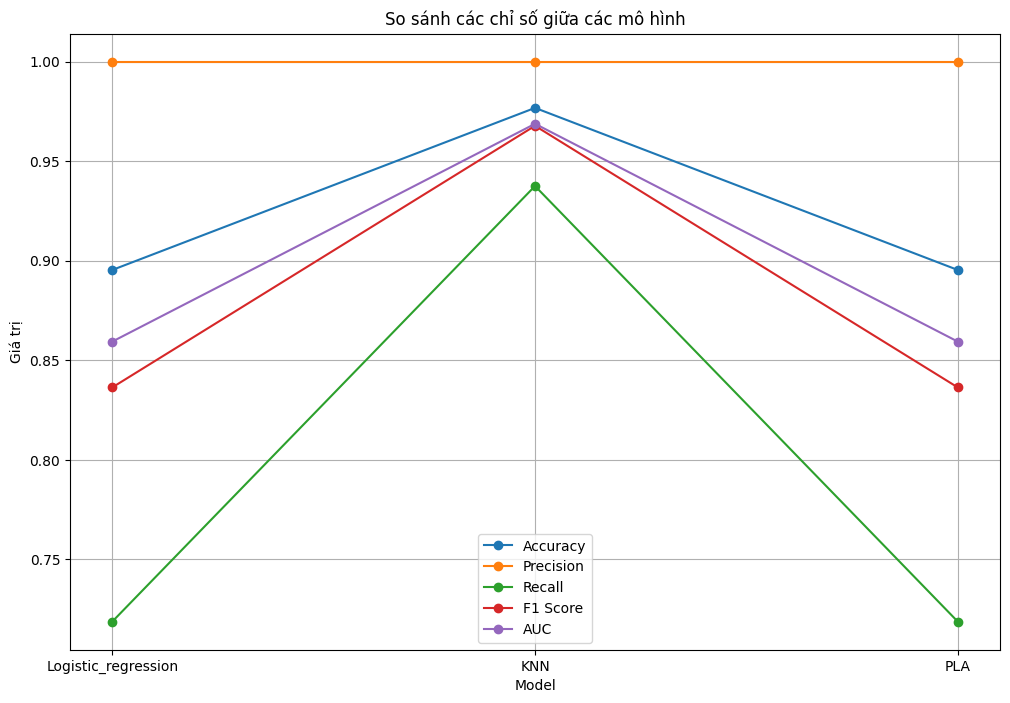

In [123]:
import matplotlib.pyplot as plt

# Lấy danh sách các models và các chỉ số
models = df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']

# Thiết lập biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ từng chỉ số
for metric in metrics:
    plt.plot(models, df[metric], marker='o', label=metric)

# Thêm tiêu đề và nhãn
plt.title('So sánh các chỉ số giữa các mô hình')
plt.xlabel('Model')
plt.ylabel('Giá trị')
plt.legend()

# Hiển thị biểu đồ
plt.grid(True)
plt.show()
